<h1>ENB10</h1><br>
<h2>1 layer, 360 neurons 50 epochs: with learning rate adjustment</h2><br>
re-run of ENB9 with learning rate tweaked to 0.05.

In [2]:
import numpy as np
import tensorflow as tf
import os
import csv
import matplotlib.pyplot as plt
from keras import models
from keras import layers
import pre_process as pp
import pickle
import time

C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\s

<h2>Pre-processing</h2>

In [3]:
data, labels = pp.pre_process()

concatenating files
AReMv1\bending1\dataset1.csv
AReMv1\bending1\dataset2.csv
AReMv1\bending1\dataset3.csv
AReMv1\bending1\dataset4.csv
AReMv1\bending1\dataset5.csv
AReMv1\bending1\dataset6.csv
AReMv1\bending1\dataset7.csv
AReMv1\bending2\dataset1.csv
AReMv1\bending2\dataset2.csv
AReMv1\bending2\dataset3.csv
AReMv1\bending2\dataset5.csv
AReMv1\bending2\dataset6.csv
AReMv1\cycling\dataset1.csv
AReMv1\cycling\dataset10.csv
AReMv1\cycling\dataset11.csv
AReMv1\cycling\dataset12.csv
AReMv1\cycling\dataset13.csv
AReMv1\cycling\dataset14.csv
AReMv1\cycling\dataset15.csv
AReMv1\cycling\dataset2.csv
AReMv1\cycling\dataset3.csv
AReMv1\cycling\dataset4.csv
AReMv1\cycling\dataset5.csv
AReMv1\cycling\dataset6.csv
AReMv1\cycling\dataset7.csv
AReMv1\cycling\dataset8.csv
AReMv1\cycling\dataset9.csv
AReMv1\lying\dataset1.csv
AReMv1\lying\dataset10.csv
AReMv1\lying\dataset11.csv
AReMv1\lying\dataset12.csv
AReMv1\lying\dataset13.csv
AReMv1\lying\dataset14.csv
AReMv1\lying\dataset15.csv
AReMv1\lying\datas

In [135]:
#train_data, train_labels, val_data, val_labels, test_data, test_labels = pp.cluster_shuffle(data, labels)

SHUFFLING ARRAYS
act0 shape:  (7, 480, 6)
act1 shape:  (5, 480, 6)
act2 shape:  (15, 480, 6)
act3 shape:  (15, 480, 6)
act4 shape:  (15, 480, 6)
act5 shape:  (15, 480, 6)
act6 shape:  (15, 480, 6)
SLICING ARRAYS
(4, 480, 6)
(2, 480, 6)
(1, 480, 6)


<h2>Experiment 10</h2>
<br>
1 layer 360 neurons

In [19]:
def build_net4():
    net4 = models.Sequential()
    net4.add(layers.Dense(480, input_shape = (480,6)))
    net4.add(layers.Dense (360, activation = 'softmax'))
    net4.add(layers.Flatten())
    net4.add(layers.Dense(7, activation = 'sigmoid'))
    net4.summary()
    return net4

In [20]:
def train_test4(net, test_no, train_data, train_labels, val_data, val_labels, test_data, test_labels):
    net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    hist4 = net.fit(train_data, train_labels, epochs = 100, validation_data = (val_data, val_labels))
    test_results = net4.evaluate(test_data, test_labels)
    test_results.insert(0,'360')
    test_results.insert(1,test_no)
    test_no = test_no + 1
    summary = []
    summary.append(test_results)
    return test_no, summary, hist4

In [21]:
historys1 = []
summary1 = []
test_no1 = 1

In [22]:
i = 1
start = time.time()
while i < 4: 
    train_data, train_labels, val_data, val_labels, test_data, test_labels = pp.cluster_shuffle(data, labels)
    net4 = build_net4()
    test_no, test_summary, hist = train_test4(net4, test_no, train_data, train_labels, val_data, val_labels, test_data, test_labels)
    summary = summary + test_summary
    historys.append(hist)
    i = i + 1
end = time.time()
elapsed = end-start
print(elapsed)

SHUFFLING ARRAYS
act0 shape:  (7, 480, 6)
act1 shape:  (5, 480, 6)
act2 shape:  (15, 480, 6)
act3 shape:  (15, 480, 6)
act4 shape:  (15, 480, 6)
act5 shape:  (15, 480, 6)
act6 shape:  (15, 480, 6)
SLICING ARRAYS
(4, 480, 6)
(2, 480, 6)
(1, 480, 6)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 480, 480)          3360      
_________________________________________________________________
dense_8 (Dense)              (None, 480, 360)          173160    
_________________________________________________________________
flatten_3 (Flatten)          (None, 172800)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 1209607   
Total params: 1,386,127
Trainable params: 1,386,127
Non-trainable params: 0
____________________________________________________________

Train on 52 samples, validate on 18 samples
Epoch 1/100
52/52 [==============================] - 1s 13ms/step - loss: 1.9303 - accuracy: 0.1538 - val_loss: 1.9056 - val_accuracy: 0.1667
Epoch 2/100
52/52 [==============================] - 0s 7ms/step - loss: 1.8847 - accuracy: 0.1731 - val_loss: 1.9223 - val_accuracy: 0.1667
Epoch 3/100
52/52 [==============================] - 0s 7ms/step - loss: 1.8911 - accuracy: 0.1731 - val_loss: 1.9334 - val_accuracy: 0.1667
Epoch 4/100
52/52 [==============================] - 0s 7ms/step - loss: 1.8971 - accuracy: 0.1538 - val_loss: 1.9275 - val_accuracy: 0.1667
Epoch 5/100
52/52 [==============================] - 0s 7ms/step - loss: 1.8939 - accuracy: 0.0577 - val_loss: 1.9112 - val_accuracy: 0.1667
Epoch 6/100
52/52 [==============================] - 0s 7ms/step - loss: 1.8844 - accuracy: 0.1154 - val_loss: 1.9029 - val_accuracy: 0.1667
Epoch 7/100
52/52 [==============================] - 0s 7ms/step - loss: 1.8830 - accuracy: 0.1731 - val_loss

52/52 [==============================] - 0s 7ms/step - loss: 1.8824 - accuracy: 0.1731 - val_loss: 1.9002 - val_accuracy: 0.1667
Epoch 8/100
52/52 [==============================] - 0s 7ms/step - loss: 1.8827 - accuracy: 0.1731 - val_loss: 1.9024 - val_accuracy: 0.1667
Epoch 9/100
52/52 [==============================] - 0s 7ms/step - loss: 1.8886 - accuracy: 0.1731 - val_loss: 1.9050 - val_accuracy: 0.1667
Epoch 10/100
52/52 [==============================] - 0s 7ms/step - loss: 1.8873 - accuracy: 0.1731 - val_loss: 1.9065 - val_accuracy: 0.1667
Epoch 11/100
52/52 [==============================] - 0s 7ms/step - loss: 1.8837 - accuracy: 0.1731 - val_loss: 1.9087 - val_accuracy: 0.1667
Epoch 12/100
52/52 [==============================] - 0s 7ms/step - loss: 1.8826 - accuracy: 0.1731 - val_loss: 1.9093 - val_accuracy: 0.1667
Epoch 13/100
52/52 [==============================] - 0s 8ms/step - loss: 1.8781 - accuracy: 0.1731 - val_loss: 1.9065 - val_accuracy: 0.1667
Epoch 14/100
52/52 [=

Epoch 65/100
52/52 [==============================] - 0s 7ms/step - loss: 0.1393 - accuracy: 1.0000 - val_loss: 1.0288 - val_accuracy: 0.7778
Epoch 66/100
52/52 [==============================] - 0s 7ms/step - loss: 0.1276 - accuracy: 1.0000 - val_loss: 1.0277 - val_accuracy: 0.7778
Epoch 67/100
52/52 [==============================] - 0s 7ms/step - loss: 0.1137 - accuracy: 1.0000 - val_loss: 1.0283 - val_accuracy: 0.7222
Epoch 68/100
52/52 [==============================] - 0s 7ms/step - loss: 0.1074 - accuracy: 1.0000 - val_loss: 1.0331 - val_accuracy: 0.7222
Epoch 69/100
52/52 [==============================] - 0s 7ms/step - loss: 0.1001 - accuracy: 1.0000 - val_loss: 1.0493 - val_accuracy: 0.7778
Epoch 70/100
52/52 [==============================] - 0s 7ms/step - loss: 0.0914 - accuracy: 1.0000 - val_loss: 1.0548 - val_accuracy: 0.7778
Epoch 71/100
52/52 [==============================] - 0s 7ms/step - loss: 0.0840 - accuracy: 1.0000 - val_loss: 1.0423 - val_accuracy: 0.7778
Epoch 

In [49]:
history1 = historys[0]
history2 = historys[1]
history3 = historys[2]

In [27]:
print(summary)

[['360', 1, 0.925410807132721, 0.8235294222831726], ['360', 2, 0.5247592329978943, 0.8235294222831726], ['360', 3, 1.130469560623169, 0.7647058963775635]]


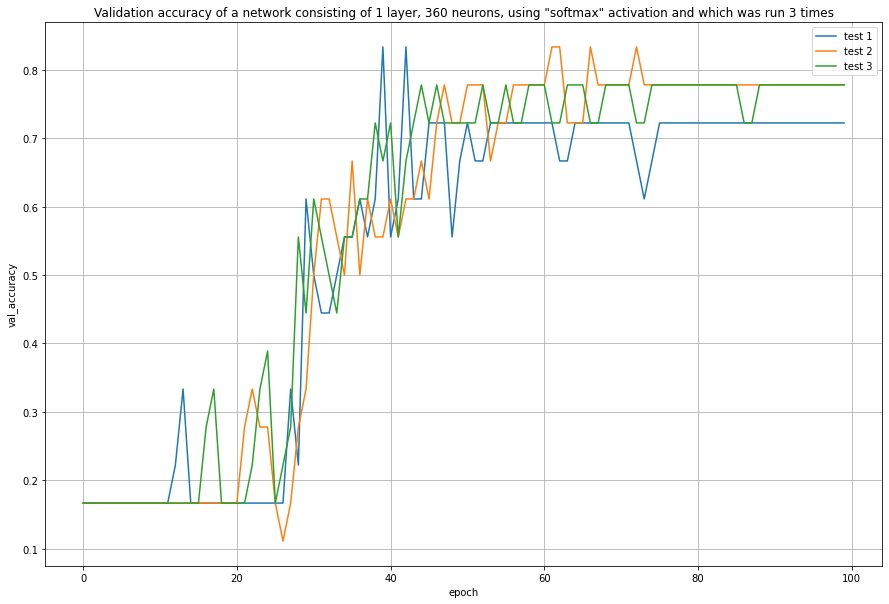

In [51]:
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['test 1','test 2','test 3'], loc='upper right')
plt.rcParams['figure.figsize'] = [15, 10]
plt.grid()
plt.title('Validation accuracy of a network consisting of 1 layer, 360 neurons, using "softmax" activation and which was run 3 times')
plt.show()

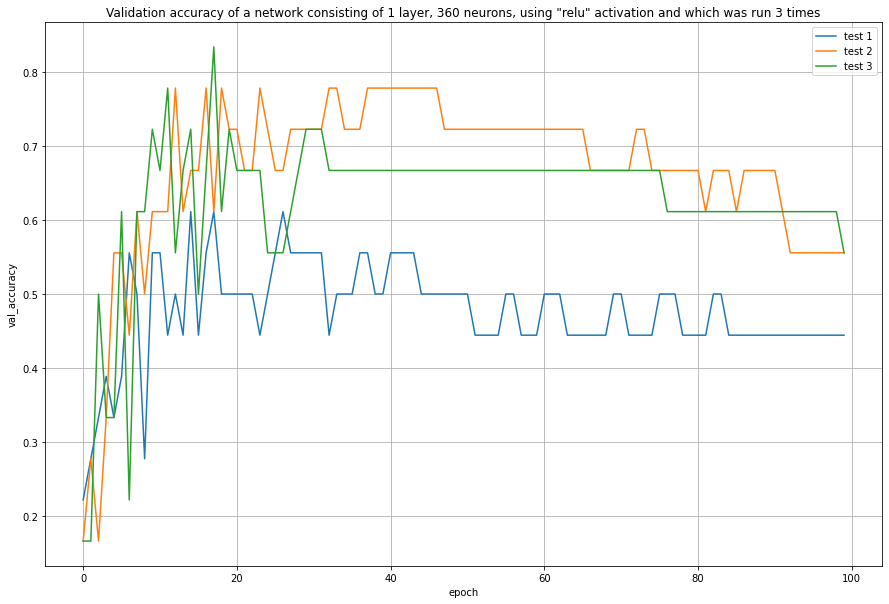

In [52]:
plt.plot(history4.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['test 1','test 2','test 3'], loc='upper right')
plt.rcParams['figure.figsize'] = [15, 10]
plt.grid()
plt.title('Validation accuracy of a network consisting of 1 layer, 360 neurons, using "relu" activation and which was run 3 times')
plt.show()

In [40]:
historys1 = []
summary1 = []
test_no1 = 1

In [41]:
i = 1
start = time.time()
while i < 4: 
    train_data, train_labels, val_data, val_labels, test_data, test_labels = pp.cluster_shuffle(data, labels)
    net3 = build_net3()
    test_no1, test_summary, hist = train_test3(net3, test_no1, train_data, train_labels, val_data, val_labels, test_data, test_labels)
    summary1 = summary1 + test_summary
    historys1.append(hist)
    i = i + 1
end = time.time()
elapsed = end-start
print(elapsed)

SHUFFLING ARRAYS
act0 shape:  (7, 480, 6)
act1 shape:  (5, 480, 6)
act2 shape:  (15, 480, 6)
act3 shape:  (15, 480, 6)
act4 shape:  (15, 480, 6)
act5 shape:  (15, 480, 6)
act6 shape:  (15, 480, 6)
SLICING ARRAYS
(4, 480, 6)
(2, 480, 6)
(1, 480, 6)
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_26 (Dense)             (None, 480, 360)          173160    
_________________________________________________________________
flatten_9 (Flatten)          (None, 172800)            0         
_________________________________________________________________
dense_27 (Dense)             (None, 7)                 1209607   
Total params: 1,386,127
Trainable params: 1,386,127
Non-trainable params: 0
____________________________________________________________

Train on 52 samples, validate on 18 samples
Epoch 1/100
52/52 [==============================] - 1s 12ms/step - loss: 2.5388 - accuracy: 0.1154 - val_loss: 1.9144 - val_accuracy: 0.1667
Epoch 2/100
52/52 [==============================] - 0s 5ms/step - loss: 1.8483 - accuracy: 0.1731 - val_loss: 1.8289 - val_accuracy: 0.2778
Epoch 3/100
52/52 [==============================] - 0s 5ms/step - loss: 1.8034 - accuracy: 0.2308 - val_loss: 1.6957 - val_accuracy: 0.1667
Epoch 4/100
52/52 [==============================] - 0s 5ms/step - loss: 1.6774 - accuracy: 0.3077 - val_loss: 1.5877 - val_accuracy: 0.3333
Epoch 5/100
52/52 [==============================] - 0s 5ms/step - loss: 1.4495 - accuracy: 0.4231 - val_loss: 1.3061 - val_accuracy: 0.5556
Epoch 6/100
52/52 [==============================] - 0s 5ms/step - loss: 1.1866 - accuracy: 0.6731 - val_loss: 1.0863 - val_accuracy: 0.5556
Epoch 7/100
52/52 [==============================] - 0s 5ms/step - loss: 1.0101 - accuracy: 0.4423 - val_loss

Epoch 6/100
52/52 [==============================] - 0s 5ms/step - loss: 1.0579 - accuracy: 0.4423 - val_loss: 1.2004 - val_accuracy: 0.6111
Epoch 7/100
52/52 [==============================] - 0s 5ms/step - loss: 0.8738 - accuracy: 0.6731 - val_loss: 1.3307 - val_accuracy: 0.2222
Epoch 8/100
52/52 [==============================] - 0s 5ms/step - loss: 0.7764 - accuracy: 0.7115 - val_loss: 1.1193 - val_accuracy: 0.6111
Epoch 9/100
52/52 [==============================] - 0s 5ms/step - loss: 0.6431 - accuracy: 0.8269 - val_loss: 1.0243 - val_accuracy: 0.6111
Epoch 10/100
52/52 [==============================] - 0s 5ms/step - loss: 0.5402 - accuracy: 0.8846 - val_loss: 1.0325 - val_accuracy: 0.7222
Epoch 11/100
52/52 [==============================] - 0s 5ms/step - loss: 0.3814 - accuracy: 0.9423 - val_loss: 1.0401 - val_accuracy: 0.6667
Epoch 12/100
52/52 [==============================] - 0s 5ms/step - loss: 0.3487 - accuracy: 0.9423 - val_loss: 0.9151 - val_accuracy: 0.7778
Epoch 13/1

Epoch 64/100
52/52 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.9539 - val_accuracy: 0.6667
Epoch 65/100
52/52 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.9544 - val_accuracy: 0.6667
Epoch 66/100
52/52 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.9526 - val_accuracy: 0.6667
Epoch 67/100
52/52 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.9495 - val_accuracy: 0.6667
Epoch 68/100
52/52 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.9529 - val_accuracy: 0.6667
Epoch 69/100
52/52 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.9542 - val_accuracy: 0.6667
Epoch 70/100
52/52 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.9565 - val_accuracy: 0.6667
Epoch 

In [39]:
def build_net3():
    net4 = models.Sequential()
    net4.add(layers.Dense(480, input_shape = (480,6)))
    net4.add(layers.Dense (360, activation = 'relu'))
    net4.add(layers.Flatten())
    net4.add(layers.Dense(7, activation = 'sigmoid'))
    net4.summary()
    return net4

In [38]:
def train_test3(net, test_no1, train_data, train_labels, val_data, val_labels, test_data, test_labels):
    net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    hist4 = net.fit(train_data, train_labels, epochs = 100, validation_data = (val_data, val_labels))
    test_results = net4.evaluate(test_data, test_labels)
    test_results.insert(0,'360')
    test_results.insert(1,test_no1)
    test_no = test_no1 + 1
    summary = []
    summary.append(test_results)
    return test_no, summary, hist4

In [47]:
history4 = historys1[0]
history5 = historys1[1]
history6 = historys1[2]

In [15]:
print(historys1)

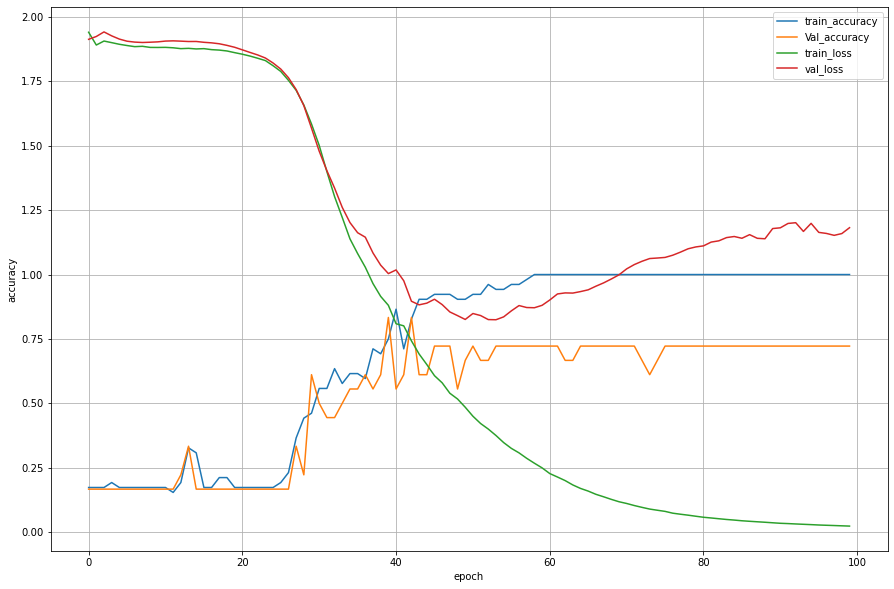

In [53]:
history1 = historys[0]
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','Val_accuracy','train_loss', 'val_loss'], loc='upper right')
plt.rcParams['figure.figsize'] = [20, 10]
plt.grid()
plt.show()

In [17]:
print(summary)

[['360', 1, 0.9061058163642883, 0.7647058963775635]]


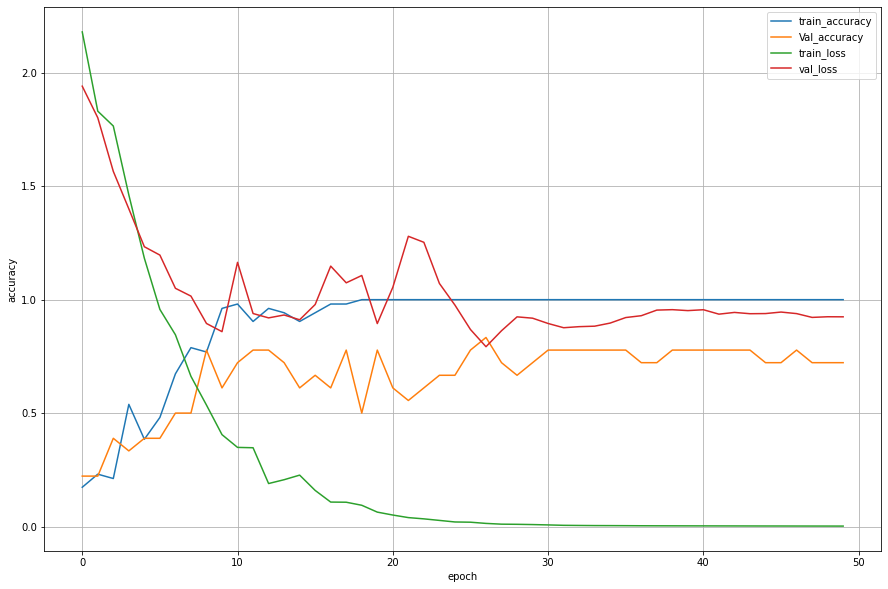

In [43]:
history2 = historys[1]
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','Val_accuracy','train_loss', 'val_loss'], loc='upper right')
plt.rcParams['figure.figsize'] = [15, 10]
plt.grid()
plt.show()

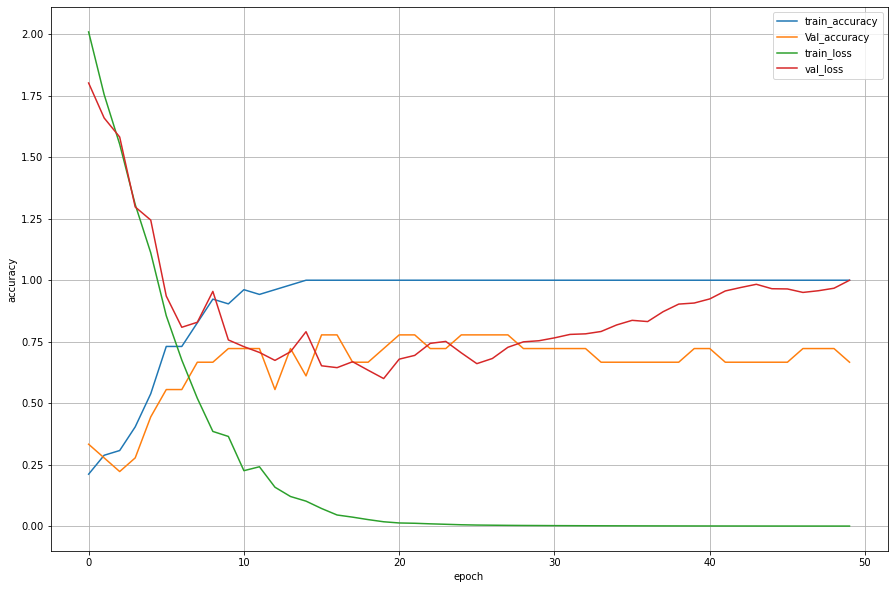

In [47]:
history3 = historys[2]
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','Val_accuracy','train_loss', 'val_loss'], loc='upper right')
plt.rcParams['figure.figsize'] = [15, 10]
plt.grid()
plt.show()

Plot showing just the validation accuracy for each test run. the jumps and steps are very erratic. I think this is probably due to the size of the data set.  I'm going to look at:<br>
1: adjusting the learning rate<br>
2:removing the bending activities from the dataset
<br>3: using a different optimizer